**DESCRIPTION**

**Problem Statement**

Amazon is an online shopping website that now caters to millions of people everywhere. Over 34,000 consumer reviews for Amazon brand products like Kindle, Fire TV Stick and more are provided.

The dataset has attributes like brand, categories, primary categories, reviews.title, reviews.text, and the sentiment. Sentiment is a categorical variable with three levels "Positive", "Negative“, and "Neutral". For a given unseen data, the sentiment needs to be predicted.

You are required to predict Sentiment or Satisfaction of a purchase based on multiple features and review text.

### Import library

In [9]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import os
from pathlib import Path

In [2]:
from sklearn import metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from scikeras.wrappers import KerasClassifier

2025-08-11 23:30:09.208562: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-11 23:30:09.215925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754944209.224164   87949 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754944209.226598   87949 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754944209.233052   87949 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [4]:
from xgboost import XGBClassifier

In [5]:
from scipy import stats as st

In [6]:
import string
from string import punctuation
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gheorghe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/gheorghe/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/gheorghe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/gheorghe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/gheorghe/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
from imblearn.over_sampling import SMOTE, SMOTEN

In [ ]:
from livelossplot import PlotLossesKerasTF

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input, Model

In [13]:

p = Path()
LOCAL_PATH   = str(p.cwd())
PATH_DATASET = str(p.cwd().joinpath("Ecommerce"))
LOCAL_PATH

'/home/gheorghe/Desktop/Simplilearn/SimplilearnShort/AI_Capstone_Project'

In [14]:
PATH_DATASET

'/home/gheorghe/Desktop/Simplilearn/SimplilearnShort/AI_Capstone_Project/Ecommerce'

# Data aquisition

In [15]:

pd_df_train_data = pd.read_csv("{}/train_data.csv".format(PATH_DATASET))
pd_df_test_data = pd.read_csv("{}/test_data.csv".format(PATH_DATASET))
pd_df_test_data_hidden = pd.read_csv("{}/test_data_hidden.csv".format(PATH_DATASET))

In [16]:
pd_df_test_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [17]:
pd_df_test_data_hidden.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [18]:
pd_df_train_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


### Functions

In [ ]:
def print_performance(labels, predictions):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
  (tp, fp), (fn, tn)  = confusion_matrix(labels, predictions)
  print("Confusion matrix: tp {}, fp {}, fn {}, tn {}".format(tp, fp, fn, tn))



In [ ]:
def pd_df_multi_class_confusion_matrix(pd_s_target, pd_s_predict):
  class_sample_ = pd_s_target.unique()
  cm = confusion_matrix(pd_s_target, pd_s_predict, labels=class_sample_)
  multi_columns = zip(['Predicted label']*(len(class_sample_)), class_sample_)
  multi_index = zip(['Actual label']*(len(class_sample_)), class_sample_)
  multi_columns = pd.MultiIndex.from_tuples(list(multi_columns))
  multi_index = pd.MultiIndex.from_tuples(list(multi_index))
  return pd.DataFrame(cm, columns=multi_columns, index=multi_index)

In [ ]:
# Compute ROC curve and ROC area for each class
def roc_curve_multiclass(pd_s_target, pd_s_predict):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  class_samples_ = pd_s_target.unique()
  # Binarize the output
  np_target = label_binarize(pd_s_target, classes=class_samples_)
  np_predict = label_binarize(pd_s_predict, classes=class_samples_)

  for sample, unique in zip(class_samples_, range(len(class_samples_))):
    fpr[sample], tpr[sample], _ = roc_curve(np_target[:, unique], np_predict[:, unique])
    roc_auc[sample] = auc(fpr[sample], tpr[sample])
  return fpr, tpr, roc_auc

In [ ]:
def plot_auc_roc_multiclass(fpr, tpr, roc_auc, class_samples_):
  plt.figure()
  lw = len(class_samples_)
  for i in class_samples_:
      plt.plot(
          fpr[i],
          tpr[i],
          lw=lw,
          label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
      )

  plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver operating characteristic example")
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
class MyTextProcess():
  def __init__(self):
    re_exp_punctuation = '[{}]'.format('\\'.join([char_ for char_ in punctuation]))
    self.reObjPunct = re.compile(re_exp_punctuation)
    self.reObjWhiteSpace = re.compile(r'\s{2, 10}')

    self.wnl = WordNetLemmatizer()

  def txt_vectorization(self, sequence):
    sequence = sequence.lower()
    sequence = self.reObjPunct.sub(' ', sequence)
    sequence = self.reObjWhiteSpace.sub(' ', sequence)
    wordslist = nltk.word_tokenize(sequence)
    wordslist = [self.wnl.lemmatize(word) for word in wordslist if word not in stopwords.words('english')]
    return wordslist


## **Project Task: Week 1**

**Class Imbalance Problem:**

1.   Perform an EDA on the dataset.
   *   See what a positive, negative, and neutral review looks like
   *   Check the class count for each class. It’s a class imbalance problem.

2.   Convert the reviews in Tf-Idf score.

3.   Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

**Tackling Class Imbalance Problem:**

4.   Oversampling or undersampling can be used to tackle the class imbalance problem.

5.   In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.

6.   Use Tree-based classifiers like Random Forest and XGBoost.

**Note:** Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.


### Perform an EDA on the dataset

#### Data preprocesing

##### Managing null values

In [ ]:
#check test data to null values
pd_df_test_data.isnull().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        3
dtype: int64

In [ ]:
#drop null value of test data
pd_df_test_data = pd_df_test_data.dropna()

In [ ]:
#check test data hidden to null values
pd_df_test_data_hidden.isnull().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        3
sentiment            0
dtype: int64

In [ ]:
#drop null value of test hidden data
pd_df_test_data_hidden = pd_df_test_data_hidden.dropna()

In [ ]:
#check train data to null values
pd_df_train_data.isnull().sum()

name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64

In [ ]:
#drop null value of train data
pd_df_train_data = pd_df_train_data.dropna()

##### Duplicated

In [ ]:
#check test data if is duplicated
pd_s_index_dubl = pd_df_test_data.duplicated()

In [ ]:
#show duplicated record, test data
pd_df_test_data[pd_s_index_dubl]

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
389,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-06-23T00:00:00.000Z,This tablet does a great deal! From surfing th...,Does a lot
420,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-10-18T00:00:00.000Z,I wanted to get something nice for my wife and...,Wife loved it
886,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablets",Electronics,2016-12-14T00:00:00.000Z,I bought one for my boyfriend and one for his ...,Great tablet for normal use


In [ ]:
#check test data hidden if is duplicated
pd_s_index_dubl = pd_df_test_data_hidden.duplicated()

In [ ]:
#show duplicated record, test data hidden
pd_df_test_data_hidden[pd_s_index_dubl]

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
389,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-06-23T00:00:00.000Z,This tablet does a great deal! From surfing th...,Does a lot,Positive
420,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-10-18T00:00:00.000Z,I wanted to get something nice for my wife and...,Wife loved it,Positive
886,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablets",Electronics,2016-12-14T00:00:00.000Z,I bought one for my boyfriend and one for his ...,Great tablet for normal use,Positive


In [ ]:
#check train data if is duplicated
pd_s_index_dubl = pd_df_train_data.duplicated()

In [ ]:
#print sum of duplicated record, train data
pd_s_index_dubl.sum()

58

In [ ]:
#show first 5 duplicated record, train data
pd_df_train_data[pd_s_index_dubl].head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
709,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive
866,"Kindle E-reader - White, 6 Glare-Free Touchscr...",Amazon,"Office,eBook Readers,Electronics Features,Walm...","Office Supplies,Electronics",2017-09-01T00:00:00.000Z,"This is really good if you read a lot, doesn't...",Great buy if you read a lot,Positive
1085,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-02-15T00:00:00.000Z,Great for kids. Simple and inexpensive. 16G mu...,Simple tablet,Positive
1116,"Kindle E-reader - White, 6 Glare-Free Touchscr...",Amazon,"Office,eBook Readers,Electronics Features,Walm...","Office Supplies,Electronics",2016-12-24T00:00:00.000Z,Item work well and was easy to read from in da...,Work,Positive
1131,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-05-27T00:00:00.000Z,"Good tablet for my daughter! She loves it ,but...",Great!,Positive


#### Encoding Techniques

In [ ]:
from sklearn import preprocessing

In [ ]:
#le_sentiment = preprocessing.LabelEncoder()
#le_sentiment.fit(pd_df_train_data['sentiment'])

#pd_df_train_data['sentiment'] = le_sentiment.transform(pd_df_train_data['sentiment'])

#### See what a positive, negative, and neutral review looks like

In [ ]:
#Check the class count of test data hidden for each target data
pd_df_test_data_hidden['sentiment'].value_counts()

Positive    934
Neutral      39
Negative     24
Name: sentiment, dtype: int64

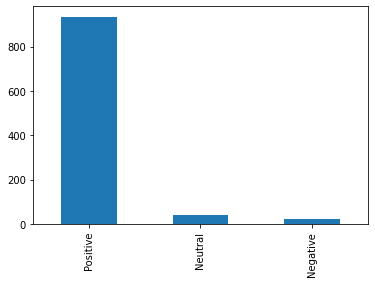

In [ ]:
#Check the class count of test data hidden for each target data
pd_df_test_data_hidden['sentiment'].value_counts().plot.bar()

In [ ]:
#Check the class count of train data for each target data. It’s a class imbalance problem
pd_df_train_data['sentiment'].value_counts()

Positive    3739
Neutral      158
Negative      93
Name: sentiment, dtype: int64

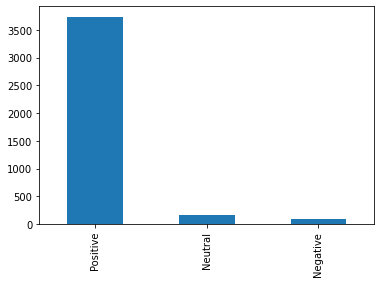

In [ ]:
#Check the class count of train data for each target data
pd_df_train_data['sentiment'].value_counts().plot.bar()

#### Data organisation

In [ ]:
#feature selection for train data
pd_s_feature_train = pd_df_train_data['reviews.title'] + ' ' + pd_df_train_data['reviews.text']
pd_s_target_train = pd_df_train_data['sentiment']

#feature selection for test data
pd_s_feature_test = pd_df_test_data['reviews.title'] + ' ' + pd_df_test_data['reviews.text']

#feature selection for test data hidden
pd_s_feature_test_hidden = pd_df_test_data_hidden['reviews.title'] + ' ' + pd_df_test_data_hidden['reviews.text']
pd_s_target_test_hidden = pd_df_test_data_hidden['sentiment']

In [ ]:
#copy train feature, all feature for bag of words
pd_s_feature = pd_s_feature_train.copy()
#add test feature
pd_s_feature = pd_s_feature.append(pd_s_feature_test, ignore_index=True)
#add test hidden feature
pd_s_feature = pd_s_feature.append(pd_s_feature_test_hidden, ignore_index=True)

In [ ]:
#print total number of record
pd_s_feature_train.shape[0] + pd_s_feature_test.shape[0] + pd_s_feature_test_hidden.shape[0]

5984

In [ ]:
#print total number of record of final data frame
pd_s_feature.shape

(5984,)

### Convert the reviews in Tf-Idf score

In [ ]:
#text process object
my_txt_process = MyTextProcess()
# bag of words by applying the function and fit the data (comment) into it
obj_bag_of_words = CountVectorizer(analyzer=my_txt_process.txt_vectorization).fit(pd_s_feature)
# apply transform method for the bag of words for all feature
all_bag_of_words = obj_bag_of_words.transform(pd_s_feature)
# apply tfidf fit method for all bag of words
obj_tfidf = TfidfTransformer().fit(all_bag_of_words)

In [ ]:
# apply transform method for the bag of words of train data
train_bag_of_words = obj_bag_of_words.transform(pd_s_feature_train)
# apply tfidf transformer for train bag of words into it (transformed version)
train_tfidf = obj_tfidf.transform(train_bag_of_words)

# apply transform method for the bag of words of test data hidden
test_hidden_bag_of_words = obj_bag_of_words.transform(pd_s_feature_test_hidden)
# apply tfidf transformer for train bag of words into it (transformed version)
test_hidden_tfidf = obj_tfidf.transform(test_hidden_bag_of_words)

### Run multinomial Naive Bayes classifier

In [ ]:
#choose naive Bayes model to detect the sentiment and fit the tfidf data into it
sentiment_NB_detection_model = MultinomialNB().fit(train_tfidf, pd_s_target_train)

In [ ]:
#check model for prediction
predict_sentiment = sentiment_NB_detection_model.predict(test_hidden_tfidf)

In [ ]:
#delete object
del sentiment_NB_detection_model

#### Evaluation metrics

In [ ]:
#Evaluation Metrics
print(metrics.classification_report(pd_s_target_test_hidden, predict_sentiment))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        24
     Neutral       0.00      0.00      0.00        39
    Positive       0.94      1.00      0.97       934

    accuracy                           0.94       997
   macro avg       0.31      0.33      0.32       997
weighted avg       0.88      0.94      0.91       997



In [ ]:
#Perform confusion matrix on pandas data frame
pd_df_conf_matrix = pd_df_multi_class_confusion_matrix(pd_s_target_test_hidden, predict_sentiment)

In [ ]:
#Show confusion matrix for test data hidden
pd_df_conf_matrix.head()

Predicted label                 
                             Positive Negative Neutral
Actual label Positive             934        0       0
             Negative              24        0       0
             Neutral               39        0       0

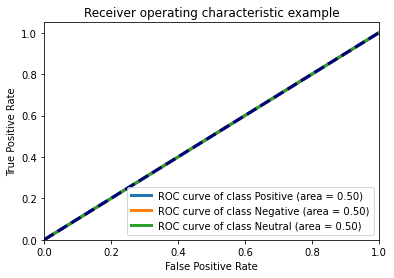

In [ ]:
fpr, tpr, roc_auc = roc_curve_multiclass(pd_s_target_test_hidden, predict_sentiment)
plot_auc_roc_multiclass(fpr, tpr, roc_auc, pd_s_target_test_hidden.unique())

### SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
#Oversampling is used to tackle the class imbalance problem.
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(train_tfidf, pd_s_target_train)
del smote

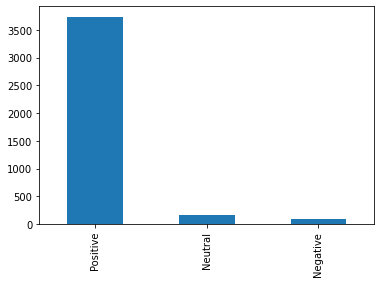

In [ ]:
#Check the class count of test data hidden for each target data
pd_s_target_train.value_counts().plot.bar()

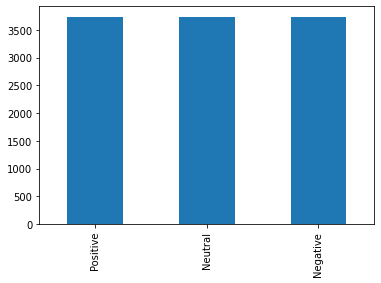

In [ ]:
y_sm.value_counts().plot.bar()

### Classifiers

#### Naive Bayes classifier

In [ ]:
#choose naive Bayes model to detect the sentiment and fit the tfidf data into it
sentiment_NB_detection_model = MultinomialNB().fit(X_sm, y_sm)

In [ ]:
#check model for prediction
predict_NB = sentiment_NB_detection_model.predict(test_hidden_tfidf)

In [ ]:
del sentiment_NB_detection_model

##### Evaluation metrics

In [ ]:
#Evaluation Metrics
print(metrics.classification_report(pd_s_target_test_hidden, predict_NB))

              precision    recall  f1-score   support

    Negative       0.50      0.54      0.52        24
     Neutral       0.26      0.51      0.34        39
    Positive       0.98      0.93      0.96       934

    accuracy                           0.91       997
   macro avg       0.58      0.66      0.61       997
weighted avg       0.94      0.91      0.92       997



In [ ]:
#Perform confusion matrix on pandas data frame
pd_df_conf_matrix = pd_df_multi_class_confusion_matrix(pd_s_target_test_hidden, predict_NB)
#Show confusion matrix for test data hidden
pd_df_conf_matrix.head()

Predicted label                 
                             Positive Negative Neutral
Actual label Positive             873        9      52
             Negative               6       13       5
             Neutral               15        4      20

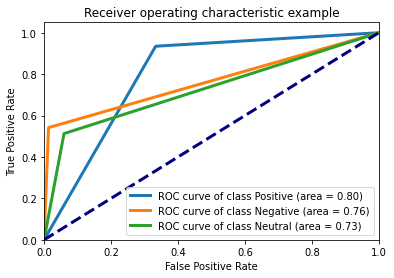

In [ ]:
fpr, tpr, roc_auc = roc_curve_multiclass(pd_s_target_test_hidden, predict_NB)
plot_auc_roc_multiclass(fpr, tpr, roc_auc, pd_s_target_test_hidden.unique())

#### Random Forests Classifier

In [ ]:
#create random forest classifier object
sentiment_RF_detection_model = RandomForestClassifier(n_jobs=-1,random_state=51)

In [ ]:
#choose random forest model to detect the sentiment and fit the tfidf data into it
sentiment_RF_detection_model.fit(X_sm, y_sm)

RandomForestClassifier(n_jobs=-1, random_state=51)

In [ ]:
#check model for prediction
predict_RF = sentiment_RF_detection_model.predict(test_hidden_tfidf)

In [ ]:
#delete object
del sentiment_RF_detection_model

##### Evaluation metrics

In [ ]:
#Evaluation Metrics
print(metrics.classification_report(pd_s_target_test_hidden, predict_RF))

              precision    recall  f1-score   support

    Negative       1.00      0.29      0.45        24
     Neutral       0.85      0.28      0.42        39
    Positive       0.95      1.00      0.98       934

    accuracy                           0.95       997
   macro avg       0.93      0.52      0.62       997
weighted avg       0.95      0.95      0.94       997



In [ ]:
#Perform confusion matrix on pandas data frame
pd_df_conf_matrix = pd_df_multi_class_confusion_matrix(pd_s_target_test_hidden, predict_RF)
#Show confusion matrix for test data hidden
pd_df_conf_matrix.head()

Predicted label                 
                             Positive Negative Neutral
Actual label Positive             932        0       2
             Negative              17        7       0
             Neutral               28        0      11

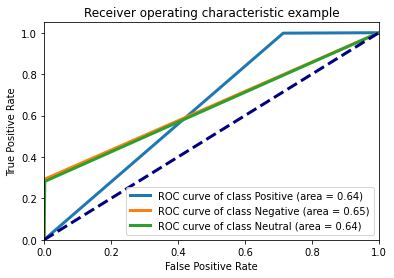

In [ ]:
fpr, tpr, roc_auc = roc_curve_multiclass(pd_s_target_test_hidden, predict_RF)
plot_auc_roc_multiclass(fpr, tpr, roc_auc, pd_s_target_test_hidden.unique())

##### Fine-tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(n_jobs=-1,random_state=51)
# Random search of parameters, using 3 fold cross validation,
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_sm, y_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=51),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.

In [ ]:
#show best pamameters
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': False}

In [ ]:
#predict sentiment with best random paramenters
predict_RF_best_rand_params = rf_random.best_estimator_.predict(test_hidden_tfidf)
#delete
del rf_random

Evaluation metrics

In [ ]:
#Evaluation Metrics
print(metrics.classification_report(pd_s_target_test_hidden, predict_RF_best_rand_params))

              precision    recall  f1-score   support

    Negative       1.00      0.29      0.45        24
     Neutral       1.00      0.28      0.44        39
    Positive       0.95      1.00      0.98       934

    accuracy                           0.95       997
   macro avg       0.98      0.52      0.62       997
weighted avg       0.96      0.95      0.94       997



#### XGBoost Classifier

In [ ]:
#create eXtreme Gradient Boosting classifier object
sentiment_XGB_detection_model = XGBClassifier(n_jobs=-1,random_state=51)

In [ ]:
#choose eXtreme Gradient Boosting model to detect the sentiment and fit the tfidf data into it
sentiment_XGB_detection_model.fit(X_sm, y_sm)

XGBClassifier(n_jobs=-1, objective='multi:softprob', random_state=51)

In [ ]:
#check model for prediction
predict_XGB = sentiment_XGB_detection_model.predict(test_hidden_tfidf)
#delete object
del sentiment_XGB_detection_model

##### Evaluation metrics

In [ ]:
#Evaluation Metrics
print(metrics.classification_report(pd_s_target_test_hidden, predict_XGB))

              precision    recall  f1-score   support

    Negative       0.24      0.25      0.24        24
     Neutral       0.15      0.15      0.15        39
    Positive       0.95      0.95      0.95       934

    accuracy                           0.90       997
   macro avg       0.45      0.45      0.45       997
weighted avg       0.90      0.90      0.90       997



In [ ]:
#Perform confusion matrix on pandas data frame
pd_df_conf_matrix = pd_df_multi_class_confusion_matrix(pd_s_target_test_hidden, predict_XGB)
#Show confusion matrix for test data hidden
pd_df_conf_matrix.head()

Predicted label                 
                             Positive Negative Neutral
Actual label Positive             887       16      31
             Negative              16        6       2
             Neutral               30        3       6

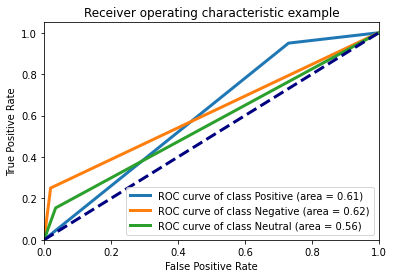

In [ ]:
fpr, tpr, roc_auc = roc_curve_multiclass(pd_s_target_test_hidden, predict_XGB)
plot_auc_roc_multiclass(fpr, tpr, roc_auc, pd_s_target_test_hidden.unique())

##### Fine-tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 90, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Step size at each iteration
eta = [.1, .2, .5, .7, 1]
# Fraction of observations that need to be sampled for each tree
subsample = [.1, .2, .5, .7, 1]
# Create the random grid
random_xgb_grid = {# Parameters that we are going to tune.
                'max_depth':max_depth,
                'n_estimators': n_estimators,
                'eta':eta,
                'subsample': subsample,
              }

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgb = XGBClassifier(n_jobs=-1, random_state=51)
# Random search of parameters, using 3 fold cross validation,
# search across 10 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgb,
                                param_distributions = random_xgb_grid,
                                n_iter = 10, cv = 3,
                                verbose=2, random_state=42,
                                n_jobs = -1)
# Fit the random search model
xgb_random.fit(X_sm, y_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(n_jobs=-1, random_state=51),
                   n_jobs=-1,
                   param_distributions={'eta': [0.1, 0.2, 0.5, 0.7, 1],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'n_estimators': [90, 302, 514, 726, 938,
                                                         1151, 1363, 1575, 1787,
                                                         2000],
                                        'subsample': [0.1, 0.2, 0.5, 0.7, 1]},
                   random_state=42, verbose=2)

In [ ]:
#show best pamameters
xgb_random.best_params_

{'subsample': 1, 'n_estimators': 1787, 'max_depth': 20, 'eta': 0.5}

In [ ]:
#predict sentiment with best random paramenters
predict_XGB_best_rand_params = xgb_random.best_estimator_.predict(test_hidden_tfidf)

#delete object
del xgb_random

Evaluation metrics

In [ ]:
#Evaluation Metrics
print(metrics.classification_report(pd_s_target_test_hidden, predict_XGB_best_rand_params))

              precision    recall  f1-score   support

    Negative       0.50      0.42      0.45        24
     Neutral       0.50      0.38      0.43        39
    Positive       0.96      0.98      0.97       934

    accuracy                           0.94       997
   macro avg       0.65      0.59      0.62       997
weighted avg       0.93      0.94      0.94       997



### Evaluation of Naive Bayes vs Random Forest vs Xgboost

In [ ]:
#Evaluation Metrics of Naive Bayes Classificator
print(metrics.classification_report(pd_s_target_test_hidden, predict_NB))

              precision    recall  f1-score   support

    Negative       0.50      0.54      0.52        24
     Neutral       0.26      0.51      0.34        39
    Positive       0.98      0.93      0.96       934

    accuracy                           0.91       997
   macro avg       0.58      0.66      0.61       997
weighted avg       0.94      0.91      0.92       997



In [ ]:
#Evaluation Metrics of Random Forest Classificator
print(metrics.classification_report(pd_s_target_test_hidden, predict_RF_best_rand_params))

              precision    recall  f1-score   support

    Negative       1.00      0.29      0.45        24
     Neutral       1.00      0.28      0.44        39
    Positive       0.95      1.00      0.98       934

    accuracy                           0.95       997
   macro avg       0.98      0.52      0.62       997
weighted avg       0.96      0.95      0.94       997



In [ ]:
#Evaluation Metrics eXtreme Gradient Boosting
print(metrics.classification_report(pd_s_target_test_hidden, predict_XGB_best_rand_params))

              precision    recall  f1-score   support

    Negative       0.50      0.42      0.45        24
     Neutral       0.50      0.38      0.43        39
    Positive       0.96      0.98      0.97       934

    accuracy                           0.94       997
   macro avg       0.65      0.59      0.62       997
weighted avg       0.93      0.94      0.94       997



In [ ]:
dict_pred = {'NB': predict_NB,
             'RF': predict_RF_best_rand_params,
             'XGB': predict_XGB_best_rand_params,
             }

In [ ]:
#
pd_s_pred_mode = pd.DataFrame(dict_pred).T.mode().T[0]

In [ ]:
#Evaluation Metrics mode of Naive Bayes, Random Forest and Xgboost
print(metrics.classification_report(pd_s_target_test_hidden, pd_s_pred_mode))

              precision    recall  f1-score   support

    Negative       0.80      0.50      0.62        24
     Neutral       0.76      0.33      0.46        39
    Positive       0.96      1.00      0.98       934

    accuracy                           0.96       997
   macro avg       0.84      0.61      0.69       997
weighted avg       0.95      0.96      0.95       997



# Conclusion

Working on this project:

- Perform an EDA on the dataset
- Convert the reviews in Tf-Idf score
- Text procesing (drop stopwords, drop punctuation and lemmatization)
- Implement several ML algorithms(Naive Bayes, Random Forest, Xgboost and SVM’s)
- Tackle the class of imbalance problem with SMOTE
- Use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve
- Use fine-tuning parameter for ML algoritm like RandomizedSearchCV
- Use ensemble techniques like: XGboost + NB + RF + SVM.
- Use LSTM, GRU and NN deep learning model
- Use fine-tuning parameter for DL models like RandomizedSearchCV
- Provided Latent Dirchlette Allocation (LDA) and Non-Negative Matrix Factorization (NMF)


I have come to the conclusion that some ML algorithms offer much better results to predict unbalanced data, but if we use some decomposition algorithms like LDA and NMF, for NN learning algorithms we can obtain results comparable to ML models. We can use fine-tuning parameter to find best parameter for best prediction.